# Random Number Generators (in order of oldest to newest)

LCG, Linear congruential generator, is obtained by formula X_(n+1)=(A*X_n+B) mod(C). The advantage of this method is that the length of the interval can be controlled by adjusting the size of C, and it can be known that it runs fast and requires less memory to retain state.The disadvantage is that this method is a periodic formula, and the parameters of the formula can be easily cracked.

<function matplotlib.pyplot.show(close=None, block=None)>

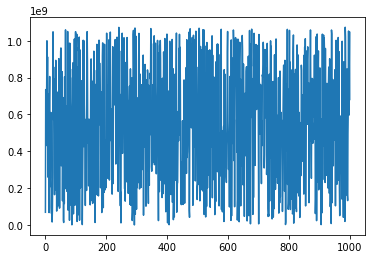

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

def LCG(N):
    "In order to reduce the interference of artificial selection of numbers, the reading system time is selected as the parameter basis"
    A=round(time.time()) 
    B=round(math.log(time.time()))
    C=2**30
    X_0=time.time()-A
    X_n=[]
    for i in range(N):
        X_n.append((A*X_0+B)%C)
        X_0=(A*X_0+B)%C
    return X_n

y=LCG(1000)
x=range(len(y))
plt.plot(x,y)
plt.show

 # Middle-Square Weyl Sequence RNG
 
The Middle-Square Weyl Sequence RNG method is a variation of the middle-square sequence method of PRNG where a Weyl Sequence is added to the loop. 
Infromation for the sequence was retrived from 

Widynski, Bernard. "Middle square Weyl sequence RNG." arXiv preprint arXiv:1704.00358 (2017).

Their method is defined by the intial parameters: 

    x: x value (initally set to 0)
    w: Weyl sequence (intially set to 0)
    s: seed (given as 0xb5ad4eceda1ce2a9) 
    
Their method is defined by the following steps:

    i)    Take the square of our x value
    ii)   Take the Weyl loop at the seed
    iii)  Add that value to the new x value
    iv)   Middle out the x value by shifting the bits by 32
 
In step three, we notice that the value can be above the integer limit 2^64, which means we cannot call the integer in python. This means that we will have to format the code in C.    

In [8]:
from ctypes import *
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

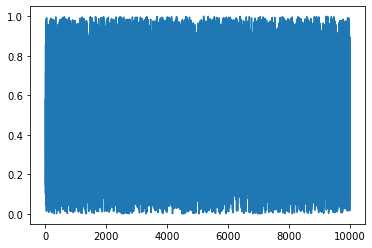

In [9]:
def MSWMethod(seed): 
    
    #c_ulonglong(value) specifies an unsigned 64 bit integer
    x = c_ulonglong(0) # x value 
    w = c_ulonglong(0) # Weyl sequence
    s = c_ulonglong(seed) # seed
    
    N = 10000
    results = []
    
    for i in range(N):
        # Following the steps
        x.value *= x.value
        w.value += s.value
        x.value += w.value
        x.value = (x.value >> 32) | (x.value << 32) # Shifting the bits by 32
        results.append(x.value)
    
    return results

 
results = np.divide(MSWMethod(seed=0xb5ad4eceda1ce2a9), 2**64) # Range of 0 < x < 1

x = range(len(results))
plt.plot(x, results)
plt.show  

In [10]:
'''Dice Test'''

def MSWMethod_Dice(seed): 
    
    #c_ulonglong(value) specifies an unsigned 64 bit integer
    x = c_ulonglong(0) # x value 
    w = c_ulonglong(0) # Weyl sequence
    s = c_ulonglong(seed) # seed
    
    results = []
    
    N = 10000
    for i in range(N):
        # Following the steps
        x.value *= x.value
        w.value += s.value
        x.value += w.value
        x.value = (x.value >> 32) | (x.value << 32) # Shifting the bits by 32
        
        val = x.value
        dval = 6*val/2**64 # Dice Value (0-6)
        
        if dval <= 1:
            dval = 1
        elif dval <= 2:
            dval = 2
        elif dval <= 3:
            dval = 3
        elif dval <= 4:
            dval = 4
        elif dval <= 5:
            dval = 5
        elif dval <= 6:
            dval = 6
        results.append(dval)
    
    return results    

<function matplotlib.pyplot.show(close=None, block=None)>

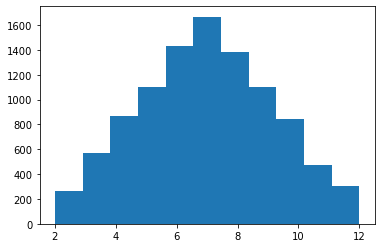

In [11]:
'''Rolling Two Dice Once'''

# Change the seed on the second dice
results = MSWMethod_Dice(seed=0xb5ad4eceda1ce2a9)
results_1 = MSWMethod_Dice(seed=0xb6ad4eceda1ce3a9)
two_dice = np.add(results, results_1)

plt.hist(two_dice, bins=11)
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

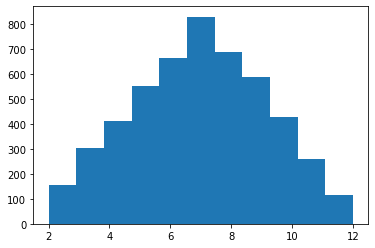

In [12]:
'''Rolling One Dice Twice'''

results = MSWMethod_Dice(seed=0xb5ad4eceda1ce2a9)

# Add consecutive values in the list together
one_di = [sum(results[i:i+2]) for i in range(0, len(results), 2)]

plt.hist(one_di, bins=11)
plt.show

# Squares RNG

Squares RNG is the more recent work of Bernard Widynski and is a counter-based version of Middle-Square Weyl Sequence RNG.
The main difference between this generator and the last is that Squares is a counter based random number generator (CBRNG). 

The main benefit of CBRNGs versus other tradition pseudorandom number generators (PRNGs) is that while PRNGs need to calculate every value sequentially, CBRNGs can calculate any value independently without knowing the previous value in the sequence.

For example a PRNG must calculate all values of n=0 through n=4 before finding n=5 where a CBRNG can simply calculate n=5 without any other calculations. This made CBRNGs the choice for multi-core CPUs and GPUs as each could work on its own calculations independently.

Squares takes a single input value and then returns a value between 0 and 0xffffffff(4294967295) by using a single key and several mathmatical and bit operations. Much like the Middle-Square Weyl Sequence RNG we are limited in our abilities and must format in C.

In [1]:
from ctypes import *
import numpy as np
import matplotlib.pyplot as plt

#Set the key as an unsigned integer
key = c_ulonglong(0xea3742c76bf95d47)
#Function which takes a single value and returns a random value from 0 - 0xffffffff
def squares(n):
    #set variables as unsigned ints
        x = c_ulonglong(0)
        y = c_ulonglong(0)
        z = c_ulonglong(0)
        b = c_ulonglong(n)
        
    #Establish variables based on n
        y.value = x.value = b.value*key.value
        z.value = y.value + key.value
    #Round 1 of altering
        x.value = x.value*x.value + y.value
        x.value = (x.value>>32)
    #Round 2
        x.value = x.value*x.value + z.value
        x.value = (x.value>>32)
    #Round 3
        x.value = x.value*x.value+y.value
        x.value = (x.value>>32)
        return x.value

In [2]:
print(squares(5))

3510494666


In [3]:
key = c_ulonglong(0xea3742c76bf95d47)
#Function which takes all values generated from 0 to n and places them into an array
def allsquares(n):
    #Initialize and array and loop for n times
    t = []
    
    for i in range(n):
        x = c_ulonglong(0)
        y = c_ulonglong(0)
        z = c_ulonglong(0)
        b = c_ulonglong(i)
        
        y.value = x.value = b.value*key.value
        z.value = y.value + key.value

        x.value = x.value*x.value + y.value
        x.value = (x.value>>32)
        x.value = x.value*x.value + z.value
        x.value = (x.value>>32)

        x.value = x.value*x.value+y.value
        x.value = (x.value>>32)
        t.append(x.value)
    return t

In [5]:
print(allsquares(6))

[3595112961, 3929498559, 58969675, 1109041340, 2795206382, 3510494666]


<function matplotlib.pyplot.show(close=None, block=None)>

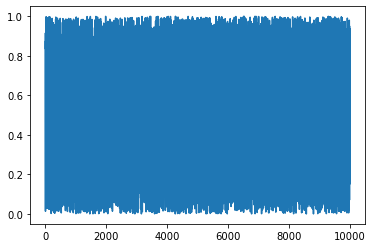

In [3]:
values = np.divide(allsquares(10000) , 0xffff_ffff) #Divide to get into a range of 0 < x < 1

x = range(len(values))
plt.plot(x, values)
plt.show  

In [4]:
key = c_ulonglong(0xea3742c76bf95d47)
#Function which takes the values of 0 through n and uses them to simulate dice rolls
def Dicesquares(n):
    t = 0
    dicerolls = []
    for i in range(n):
        x = c_ulonglong(0)
        y = c_ulonglong(0)
        z = c_ulonglong(0)
        b = c_ulonglong(i)
        
        y.value = x.value = b.value*key.value
        z.value = y.value + key.value

        x.value = x.value*x.value + y.value
        x.value = (x.value>>32)
        x.value = x.value*x.value + z.value
        x.value = (x.value>>32)

        x.value = x.value*x.value+y.value
        x.value = (x.value>>32)
        t = (x.value)
        
        dice = 6*t/0xffff_ffff # Dice Value (0-6)
        
        if dice <= 1:
            dice = 1
        elif dice <= 2:
            dice = 2
        elif dice <= 3:
            dice = 3
        elif dice <= 4:
            dice = 4
        elif dice <= 5:
            dice = 5
        elif dice <= 6:
            dice = 6
        dicerolls.append(dice)
    return dicerolls

In [5]:
key = c_ulonglong(0xea3742c76bf95d47)
#Function which takes the values of n through 2*n and uses them to simulate dice rolls
def Dicesquares2(n):
    t = 0
    dicerolls = []
    for i in range(n):
        x = c_ulonglong(0)
        y = c_ulonglong(0)
        z = c_ulonglong(0)
        b = c_ulonglong(i+n)
        
        y.value = x.value = b.value*key.value
        z.value = y.value + key.value

        x.value = x.value*x.value + y.value
        x.value = (x.value>>32)
        x.value = x.value*x.value + z.value
        x.value = (x.value>>32)

        x.value = x.value*x.value+y.value
        x.value = (x.value>>32)
        t = (x.value)
        
        dice = 6*t/0xffff_ffff # Dice Value (0-6)
        
        if dice <= 1:
            dice = 1
        elif dice <= 2:
            dice = 2
        elif dice <= 3:
            dice = 3
        elif dice <= 4:
            dice = 4
        elif dice <= 5:
            dice = 5
        elif dice <= 6:
            dice = 6
        dicerolls.append(dice)
    return dicerolls

<function matplotlib.pyplot.show(close=None, block=None)>

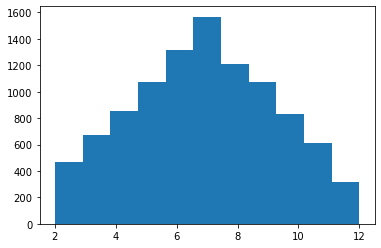

In [6]:
#Simulate and graph the rolling of two dice
die1 = Dicesquares(10000)
die2 = Dicesquares2(10000)
two_dice = np.add(die1, die2)
plt.hist(two_dice, bins=11)
plt.show 

Itamaraca is a newer method of psuedo-random number generation which uses absolute value functions to generate a series of psuedo-random numbers using the three previous generated numbers. 

The method takes a maximum value, three starting seeds and an arbritary constant.

The agorithm itself is a process number
$$ P(s1, s2, s3) = |((s3 - s2)+(s2 - s1)|$$
and a generated number
$$ Fn(p) = |M - (P(s1,s2,s3) * \sqrt{K})|$$
With M being the maximum value, and K being a constant from 1 < K < 4

The last component is moving s2 to s1, s3 to s2, and newly generated Fn to s3, for each iteration.

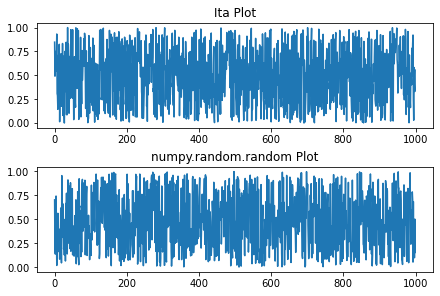

In [5]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt

def Itamaraca(N = 1):
    """
    Psuedo-random number generator using absolute value functions
    Technique by
    Henrique Pereira, D. (2022). Itamaracá: A Novel Simple Way to Generate Pseudo-random Numbers. Cambridge Open Engage. doi:10.33774/coe-2022-zsw6t 
    
    Seed generation method from
    https://www.youtube.com/watch?v=zHZx9ByTo2s
    
    Generates a list of random numbers from 0 < x < 1 
    Args:
    N int:
        number of iterations, returns int if 1, returns list if greater than 1
        default is set to 1
    """
    #any number here, more precision with larger numbers
    m = 2**31
    #seed generation, needs 3 numbers smaller then m
    #gets number from time muiltiplied by processing id, then takes the modulus of m to get a number less then m
    #random factors added to generate diffrent numbers
    snlist = [int(time.time()*os.getpid())%m, int(time.time()*os.getpid()*15)%m,int(time.time()*os.getpid()*73)%m]

    #case for single number
    if N  == 1:
        p = np.absolute((snlist[2]-snlist[1])+(snlist[1]-snlist[0]))
        #needs square root of number between 1<x<4
        #used pi for the squareroot variable 
        FN = int(np.absolute(m-(p*np.sqrt(3.1459))))
        return FN/m
    
    #case for list of numbers
    elif N > 1:
        p = 0 
        FN = 0
        results = []
        for i in range(N):
            p = np.absolute((snlist[2]-snlist[1])+(snlist[1]-snlist[0]))
            #needs square root of number between 1<x<4
            FN = int(np.absolute(m-(p*np.sqrt(3.1459))))
            #dividing FN/n gives you a float ranging from 0 < x < 1
            results.append(FN/m)
            #adds FN to newest sn number, then pops oldest number
            snlist.append(FN)
            snlist.pop(0)
        return results
    #error case
    else:
        print("ERROR: N < 0, Has to be greater than 1")

results = Itamaraca(1000)
results2 = np.random.random(1000)
x = range(len(results))

fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(x, results)
axs[0].set_title("Ita Plot")

axs[1].plot(x, results2)
axs[1].set_title("numpy.random.random Plot")
plt.show()

Overall the Ita random generator creates a good set of random numbers. Compared with numpy's random function, the graph of Ita has much larger gaps, which shows a worse distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

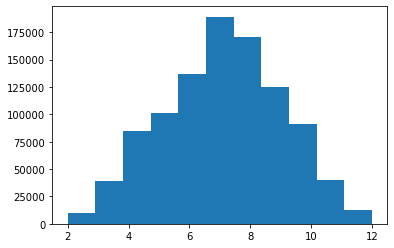

In [7]:
def diceroll(N):
    rolls = Itamaraca(2*N)
    results = []
    for i in range(0,2*N-1, 2):
        dice = round(1+(5*rolls[i])) + round(1+(5*rolls[i+1]))
        results.append(dice)
    return results

results = diceroll(1000000)
plt.hist(results, bins=11)
plt.show 